In [12]:
import os
import sys
import math
import time
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from helper import lineNotify as LN
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Helper function
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)
        
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()

In [3]:
def relu(x):
    return np.maximum(0,x)  

def softmax(x):
    exp_x = np.exp(x)
    softmax_x = exp_x / np.sum(exp_x)
    return softmax_x 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Load numpy array

In [4]:
# ft_ls = os.listdir('./npy/')
# ft_ls

['social_IG.npy',
 'all_4876.npy',
 'all_2372.npy',
 'imdb.npy',
 'all_2834.npy',
 'user_genre.npy',
 'social.npy',
 'social_imdb.npy',
 'IGimg.npy',
 'user_followings.npy',
 'video.npy',
 'text.npy',
 'all_4882.npy',
 'IG.npy',
 'movie_genre.npy',
 'mask1ft',
 'follow.npy',
 'image.npy',
 '.ipynb_checkpoints',
 'poster.npy']

In [4]:
ft_ls = ['imdb.npy', 'IG.npy']
ft_ls

['imdb.npy', 'IG.npy']

In [5]:
def loadFt(PATH):
    return np.load(PATH)

# Normalize usr_genre
def ugNorm(usr_genre):
    usr_genre_norm = np.zeros(usr_genre.shape)
    for i in range(len(usr_genre)):
        usr_genre_norm[i] = usr_genre[i]/np.max(usr_genre[i])
    print(usr_genre_norm.shape)
    return usr_genre_norm

In [6]:
def train_test_split(usr_following):
    #The number of following movie for each user
    each_user = np.sum(usr_following, axis=1)
    # print(each_user)

    print('Min number of followings:', np.min(each_user))
    print('Max number of followings:', np.max(each_user))
    print('Avg of followers:', np.mean(each_user))

    asc = np.sort(each_user)
    # print(each_user)
    # print(asc)
    desc = np.flip(asc)
    # print(desc)
    
    print('Over 10:', np.sum(each_user >= 10))
    print('Over 12:', np.sum(each_user >= 12))
    print('Over 14:', np.sum(each_user >= 14))
    print('Over 16:', np.sum(each_user >= 16))
    print('Over 18:', np.sum(each_user >= 18))
    print('Over 20:', np.sum(each_user >= 20))
    
    usr_idx = [i for i in range(len(usr_following))]
    print(len(usr_idx))

    random.seed(42)
    test_idx = sorted(random.sample(usr_idx, usr_test_amount))
    print(len(test_idx), test_idx[:10]) # 150 [13, 51, 54, 61, 65, 88, 93, 96, 114, 130]

    # init
    train_t = []
    train_f = []
    test_t = []
    test_f = []

    for i in range(usr_nb):
        # init
        t_for_train = []
        f_for_train = []
        t_for_test = []
        f_for_test = []

        if i not in test_idx: #if not in test id, just append it to true or false list
            for j in range(movie_nb):
                if usr_following[i][j] == 1:
                    t_for_train.append(j)
                else:
                    f_for_train.append(j)

            train_t.append(t_for_train)
            train_f.append(f_for_train)
    #         print(len(t_for_train) + len(f_for_train))

        else: #if in test id, choose half of true and other 
            temp_t = []
            temp_f = []

            for j in range(movie_nb):
                if usr_following[i][j] == 1:
                    temp_t.append(j)
                else:
                    temp_f.append(j)

            # random choose half true and half false for test 
            t_for_test = random.sample(temp_t, math.ceil(0.5*len(temp_t)))
            f_for_test  = random.sample(temp_f, movie_test_amount-len(t_for_test))

            test_t.append(t_for_test)
            test_f.append(f_for_test)

            #the others for training
            t_for_train = [item for item in temp_t if not item in t_for_test]
            f_for_train = [item for item in temp_f if not item in f_for_test]
            train_t.append(t_for_train)
            train_f.append(f_for_train)

        if not (len(t_for_train) + len(f_for_train) + len(t_for_test) + len(f_for_test)) == movie_nb:
            print('Error!!!')
            break
    
    return train_t, train_f, test_t, test_f

In [7]:
# Basic setup
usr_following = np.load('./npy/user_followings.npy')
usr_genre = np.load('./npy/user_genre.npy')
movie_genre = np.load('./npy/movie_genre.npy')

print('Movie genre:', movie_genre.shape)
print('User following:', usr_following.shape)
print('User genre:', usr_genre.shape)

usr_nb = len(usr_following) # the number of users
movie_nb = len(movie_genre)  # the number of movies
print(usr_nb, movie_nb)

usr_test_amount = 150
movie_test_amount = 32
print(usr_test_amount, movie_test_amount)

usr_genre_norm = ugNorm(usr_genre)
train_t, train_f, test_t, test_f = train_test_split(usr_following)

# Stat
#average num of following for training user
total_train = 0
for t in train_t:
    total_train += len(t)
avg = total_train / usr_nb
print('Training:', avg)

#average num of following for testing user
total_test = 0
for t in test_t:
    total_test += len(t)
avg = total_test / usr_test_amount
print('Testing:', avg)

all_auxilary = [i for i in range(movie_nb)]

Movie genre: (165, 20)
User following: (1582, 165)
User genre: (1582, 20)
1582 165
150 32
(1582, 20)
Min number of followings: 10
Max number of followings: 133
Avg of followers: 14.820480404551201
Over 10: 1582
Over 12: 937
Over 14: 613
Over 16: 440
Over 18: 315
Over 20: 229
1582
150 [13, 51, 54, 61, 65, 88, 93, 96, 114, 130]
Training: 14.139064475347661
Testing: 7.1866666666666665


In [8]:
def training(SAVE_NAME):
    print('==================================================')
    print(SAVE_NAME)
    print('Start time:', time.ctime())

    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    loss_acc_list = []
    t0 = time.time()

    train_yes_id=[]

    for q in range(6):
        print('Epoch:',q)
        train_auc = 0
        total_loss = 0
        xuij_auc = 0
        length = 0

        for z in range(usr_nb):
            writeProgress('Progress:', z, usr_nb)
            """
            yes 用來存放選擇到的YouTuber feature (for auxilary)
            yesr 用來存放user對該YouTuber的喜好程度(user_category 跟 YouTuber_category的相似性)
            r_3 用來存放user 對該YouTuber種類的偏好(取max)
            """
            yes = []
            yesr = []

    #         #選全部的Positive
    #         sample = random.sample(train_t[z],len(train_t[z]))
            #選全部的電影
            sample = all_auxilary

            #change
            r_3 = np.zeros(len(sample))

            for b in range(len(sample)):
                yes.append(all_npy[sample[b]])
                yesr.append(movie_genre[sample[b]] * usr_genre_norm[z])

            for b in range(len(yesr)):
                r_3[b]=max(yesr[b])
            #print('r_3:',r_3)

            yes = np.array(yes)

            # positive sample
            train_t_sample = train_t[z]
            for ta in train_t_sample:
                #print(ta,'--> positive feedback')

                pos = sample.index(ta)

                image_1=np.expand_dims(all_npy[ta],0)
                train_f_sample = random.sample(train_f[z],10)

                for b in train_f_sample:
                    image_2 = np.expand_dims(all_npy[b],0)

                    _last_be_relu, _norm_par, _a_list, r3, _auc, _loss, _ = sess.run(
                        [last_be_relu, norm_par, a_list_smooth, a_list_soft, auc, loss, train_op], 
                        feed_dict={user: [z], i: [ta], j: [b], xf: yes, 
                                   l_id:sample, l_id_len:[len(sample)],
                                   positive_id: train_t[z], positive_len:[len(train_t[z])],
                                   r: r_3, image_i: image_1, image_j: image_2})

                    '''Observe all params
                    print('u,vi,vj',_norm_par[:3])
                    print('w1,wu,wy,wa,wv',_norm_par[3:7])
                    print('beta',_norm_par[7])
                    print('Embedding',_norm_par[8])
                    print('after softmax:', r3)
                    print('before softmax:', _a_list)
                    print('---------------------------------------------------')
                    '''
                    train_auc += _auc
                    total_loss += _loss
                    length += 1

        print("{:<20}{}".format('total_loss', total_loss/length))
        print("{:<20}{}".format('train_auc:', train_auc/length))

        loss_acc_list.append([total_loss/length, train_auc/length])

        print('\tCurrent time:', time.ctime(), ' sec')
        print('==================================================')

    print('Total cost time:',time.time()-t0, ' sec')

    print('End time:', time.ctime())
    
    U, Y, A, E, Au, Ay, Aa, Av, B = sess.run([user_latent, item_latent, aux_item, embedding, Wu, Wy, Wa, Wv, Beta])
    np.savez('./weight/mask1ft/' + SAVE_NAME + '.npz',
             U=U, Y=Y, A=A, E=E, Wu=Au, Wy=Ay, Wa=Aa, Wv=Av, B=B)
    
    return loss_acc_list

imdb.npy
All features: (165, 2358)
64 2358 240
SAVE_NAME: imdb
imdb
Start time: Sun Jul 19 15:24:13 2020
Epoch: 0
total_loss          [[0.6734199]]
train_auc:          0.7684281115879829
	Current time: Sun Jul 19 18:49:05 2020  sec
Epoch: 1
total_loss          [[0.56653223]]
train_auc:          0.8104837267525036
	Current time: Sun Jul 19 22:14:19 2020  sec
Epoch: 2
total_loss          [[0.54482097]]
train_auc:          0.8304273962804005
	Current time: Mon Jul 20 01:38:20 2020  sec
Epoch: 3
total_loss          [[0.52573197]]
train_auc:          0.8450867310443491
	Current time: Mon Jul 20 05:02:40 2020  sec
Epoch: 4
total_loss          [[0.51355214]]
train_auc:          0.8551546852646638
	Current time: Mon Jul 20 08:27:03 2020  sec
Epoch: 5
total_loss          [[0.50440794]]
train_auc:          0.8635103719599427
	Current time: Mon Jul 20 11:51:35 2020  sec
Total cost time: 73639.30410909653  sec
End time: Mon Jul 20 11:51:35 2020
Epoch: range(1, 7)
Loss: [0.6734198967274678, 0.56653

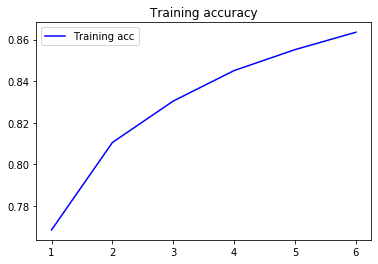

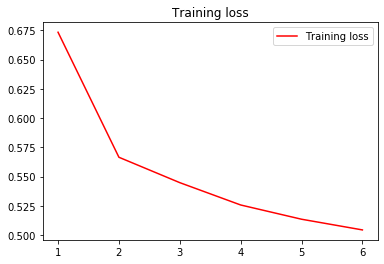

IG.npy
All features: (165, 2062)
64 2062 240
SAVE_NAME: IG
IG
Start time: Mon Jul 20 11:51:37 2020
Epoch: 0


KeyboardInterrupt: 

In [14]:
for ft in ft_ls:
    print(ft)
#     PATH = './npy/mask1ft/' + ft
    PATH = './npy/' + ft
    all_npy = loadFt(PATH)
    print('All features:', all_npy.shape)
    
    latent_dim = 64 # latent dims
    ft_dim = all_npy.shape[1] # feature dims
    embedding_dims = 240
    print(latent_dim, ft_dim, embedding_dims)
    
    SAVE_NAME = ft.split('.')[0]
    print('SAVE_NAME:', SAVE_NAME)
    
    tf.reset_default_graph()

    user = tf.placeholder(tf.int32,shape=(1,))
    i = tf.placeholder(tf.int32, shape=(1,))
    j = tf.placeholder(tf.int32, shape=(1,))

    #多少個auxliary 
    xf = tf.placeholder(tf.float32, shape=(None, ft_dim))
    l_id = tf.placeholder(tf.int32, shape=(None,))
    l_id_len = tf.placeholder(tf.int32,shape=(1,))
    r = tf.placeholder(tf.float32,shape=(None,))
    positive_id = tf.placeholder(tf.int32, shape=(None,))
    positive_len = tf.placeholder(tf.int32,shape=(1,))

    image_i = tf.placeholder(tf.float32, [1, ft_dim])
    image_j = tf.placeholder(tf.float32, [1, ft_dim])

    with tf.variable_scope("item_level"):
        user_latent = tf.get_variable("user_latent", [usr_nb, latent_dim],
                                      initializer=tf.random_normal_initializer(0,0.1,seed=8))
        item_latent = tf.get_variable("item_latent", [movie_nb, latent_dim],
                                      initializer=tf.random_normal_initializer(0,0.1,seed=9)) 
        aux_item = tf.get_variable("aux_item", [movie_nb, latent_dim],
                                   initializer=tf.random_normal_initializer(0,0.1,seed=10))

    #     W1 = tf.get_variable("W1", [usr_nb, movie_nb, latent_dim], initializer=tf.contrib.layers.xavier_initializer())
        Wu = tf.get_variable("Wu", [usr_nb, movie_nb, latent_dim], initializer=tf.contrib.layers.xavier_initializer())
        Wy = tf.get_variable("Wy", [usr_nb, movie_nb, latent_dim], initializer=tf.contrib.layers.xavier_initializer())
        Wa = tf.get_variable("Wa", [usr_nb, movie_nb, latent_dim], initializer=tf.contrib.layers.xavier_initializer())
        Wv = tf.get_variable("Wv", [usr_nb, movie_nb, embedding_dims], initializer=tf.contrib.layers.xavier_initializer())
    #     Wve = tf.get_variable("Wve", [embedding_dims, ft_dim], initializer=tf.contrib.layers.xavier_initializer())

        aux_new = tf.get_variable("aux_new", [1, latent_dim], initializer=tf.constant_initializer(0.0))

    with tf.variable_scope('feature_level'):
        embedding = tf.get_variable("embedding", [embedding_dims,ft_dim],
                                    initializer=tf.contrib.layers.xavier_initializer())
        Beta = tf.get_variable("beta", [usr_nb, embedding_dims],
                               initializer=tf.random_normal_initializer(0.01, 0.001, seed=10))

    #lookup the latent factors by user and id
    u = tf.nn.embedding_lookup(user_latent, user)
    vi = tf.nn.embedding_lookup(item_latent, i)
    vj = tf.nn.embedding_lookup(item_latent, j)

    # w1 = tf.nn.embedding_lookup(W1, user)
    wu = tf.squeeze(tf.nn.embedding_lookup(Wu, user))
    wy = tf.squeeze(tf.nn.embedding_lookup(Wy, user))
    wa = tf.squeeze(tf.nn.embedding_lookup(Wa, user))
    wv = tf.squeeze(tf.nn.embedding_lookup(Wv, user))

    beta = tf.nn.embedding_lookup(Beta, user) #user feature latent factor
    
    a_list = tf.Variable([])
    q = tf.constant(0)

    def att_cond(q,a_list):
        return tf.less(q,l_id_len[0])

    def att_body(q,a_list):
        xfi = tf.expand_dims(xf[q],0) #(1,l)
        wuui = tf.expand_dims(tf.nn.embedding_lookup(wu,l_id[q]),0) #取該YOUTUBER那欄(1,K)
        wyui = tf.expand_dims(tf.nn.embedding_lookup(wy,l_id[q]),0) #取該YOUTUBER那欄(1,K)
        waui = tf.expand_dims(tf.nn.embedding_lookup(wa,l_id[q]),0) #取該YOUTUBER那欄(1,K)
        wvui = tf.expand_dims(tf.nn.embedding_lookup(wv,l_id[q]),0) #取該YOUTUBER那欄(1,K)

        a_list = tf.concat([a_list,[(tf.nn.relu(tf.matmul(wuui, u, transpose_b=True) +
                                                tf.matmul(wyui, tf.expand_dims(tf.nn.embedding_lookup(item_latent,l_id[q]),0), transpose_b=True) +
                                                tf.matmul(waui, tf.expand_dims(tf.nn.embedding_lookup(aux_item, l_id[q]),0), transpose_b=True) +
                                                tf.matmul(wvui, tf.matmul(embedding,xfi, transpose_b=True)))[0][0])*r[q]]],0)
        q += 1
        return q, a_list

    _, a_list = tf.while_loop(att_cond,att_body,[q,a_list],shape_invariants=[q.get_shape(),tf.TensorShape([None])])

    a_list_smooth = tf.add(a_list,0.0000000001)
    a_list_soft = tf.divide(a_list_smooth,tf.reduce_sum(a_list_smooth, 0)) #without softmax

    norm_par = [wu,wy,wa,wv]

    wuui = tf.expand_dims(tf.nn.embedding_lookup(wu,l_id[-1]),0)
    wyui = tf.expand_dims(tf.nn.embedding_lookup(wy,l_id[-1]),0)
    waui = tf.expand_dims(tf.nn.embedding_lookup(wa,l_id[-1]),0)
    wvui = tf.expand_dims(tf.nn.embedding_lookup(wv,l_id[-1]),0)
    wu_be_relu = tf.matmul(wuui, u, transpose_b=True)
    wy_be_relu = tf.matmul(wyui, tf.expand_dims(tf.nn.embedding_lookup(item_latent,l_id[-1]),0), transpose_b=True)
    wa_be_relu = tf.matmul(waui, tf.expand_dims(tf.nn.embedding_lookup(aux_item, l_id[-1]),0), transpose_b=True)
    wv_be_relu = tf.matmul(wvui, tf.matmul(embedding,tf.expand_dims(xf[-1],0), transpose_b=True))

    last_be_relu = [wu_be_relu,wy_be_relu,wa_be_relu,wv_be_relu]

    aux_np = tf.expand_dims(tf.zeros(latent_dim),0)
    q = tf.constant(0)

    def sum_att_cond(q,aux_np):
        return tf.less(q,l_id_len[0])

    def sum_att_body(q,aux_np):
        aux_np = tf.math.add_n([aux_np,a_list_soft[q]*tf.expand_dims(tf.nn.embedding_lookup(aux_item, l_id[q]),0)]) 
        q += 1
        return q, aux_np

    _, aux_np = tf.while_loop(sum_att_cond, sum_att_body, [q,aux_np])

    aux_part = tf.matmul(aux_np, vi, transpose_b=True)
    aux_np += u #user_latent factor + sum (alpha*auxilary)
    aux_new = tf.assign(aux_new,aux_np) #把aux_new 的 值變成aux_np

    latent_i_part = tf.matmul(aux_new, vi, transpose_b=True)
    feature_i_part = tf.matmul(beta,(tf.matmul(embedding,image_i, transpose_b=True)))
    latent_j_part = tf.matmul(aux_new, vj, transpose_b=True)
    feature_j_part = tf.matmul(beta,(tf.matmul(embedding,image_j, transpose_b=True)))
    only_aux_i_part = tf.matmul(aux_np, vi, transpose_b=True)
    only_aux_j_part = tf.matmul(aux_np, vj, transpose_b=True)

    #矩陣中對應函數各自相乘
    # ex: tf.matmul(thetav,(tf.matmul(embedding, image_i, transpose_b=True)))
    xui = tf.matmul(aux_new, vi, transpose_b=True)+ tf.matmul(beta,(tf.matmul(embedding,image_i, transpose_b=True)))
    xuj = tf.matmul(aux_new, vj, transpose_b=True)+ tf.matmul(beta,(tf.matmul(embedding,image_j, transpose_b=True)))
    xuij = tf.subtract(xui,xuj)

    l2_norm = tf.add_n([
                0.0001 * tf.reduce_sum(tf.multiply(u, u)),
                0.0001 * tf.reduce_sum(tf.multiply(vi, vi)),
                0.0001 * tf.reduce_sum(tf.multiply(vj, vj)),

                0.01 * tf.reduce_sum(tf.multiply(wu, wu)),
                0.01 * tf.reduce_sum(tf.multiply(wy, wy)),
                0.01 * tf.reduce_sum(tf.multiply(wa, wa)),
                10 * tf.reduce_sum(tf.multiply(wv,wv)),

                0.001 * tf.reduce_sum(tf.multiply(beta,beta)),
                0.01 * tf.reduce_sum(tf.multiply(embedding,embedding))
              ])

    loss = l2_norm - tf.log(tf.sigmoid(xuij)) # objective funtion
    train_op = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss) #parameter optimize 
    auc = tf.reduce_mean(tf.to_float(xuij > 0))
    
    loss_acc_list = training(SAVE_NAME)
    
    # training history
    epochs = range(1, len(loss_acc_list) + 1)
    print('Epoch:', epochs)
    loss = [ls[0].tolist()[0][0] for ls in loss_acc_list]
    print('Loss:', loss)
    acc = [ls[1] for ls in loss_acc_list]
    print('Acc:', acc)
    print('==================================================')
    
    plt.figure()
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.title('Training accuracy')
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.title('Training loss')
    plt.legend()
    plt.show()
    
    LN(SAVE_NAME)
#     print('==================================================')